In [ ]:

#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn
#pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Book2.csv", delimiter=';')

#df['Tanggal'] = pd.to_datetime(df['Tanggal'], infer_datetime_format=True)
#df = df.set_index('Tanggal')


In [ ]:
df.head()

,Tanggal,IDR,SBI,CPI,EXP,IMP,M2,OECD,GPM,TLKM
0,2020-05-01,14575.0,4.50,3.718,10736197967,9088168344,1.262111e+11,98.45,-32.733629,3.15
1,2020-04-01,14825.0,4.50,3.824,12354195223,12230446623,1.235632e+11,99.08,-17.573075,3.50
2,2020-03-01,16300.0,4.50,3.430,13679902374,12957009839,1.168747e+11,100.12,-1.423400,3.16
3,2020-02-01,14340.0,4.75,3.906,15161518751,12908365959,1.263023e+11,100.89,2.779785,3.49
4,2020-01-01,13650.0,5.00,4.159,14260110167,13673913951,1.277356e+11,101.34,1.054202,3.80


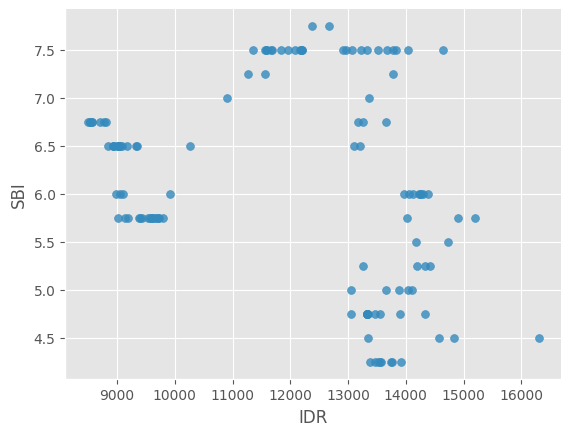

In [ ]:
# @title IDR vs SBI

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='IDR', y='SBI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.describe()

,IDR,SBI,CPI,EXP,IMP,M2,OECD,GPM,TLKM
count,125.000000,125.00000,125.000000,1.250000e+02,1.250000e+02,1.250000e+02,125.00000,125.000000,125.000000
mean,11932.900000,6.10600,4.672208,1.430274e+10,1.377527e+10,1.074317e+11,100.79864,4.010712,2.861920
std,2167.881475,1.05124,1.622662,1.724591e+09,1.883408e+09,1.360395e+10,0.59258,5.114610,1.030039
min,8495.000000,4.25000,2.033000,9.494174e+09,9.088168e+09,6.700431e+10,98.45000,-32.733629,1.373000
25%,9530.000000,5.25000,3.331000,1.329294e+10,1.214018e+10,1.014515e+11,100.45000,2.417661,1.845000
50%,12960.000000,6.00000,4.295000,1.442238e+10,1.417570e+10,1.080467e+11,100.85000,4.458260,2.845000
75%,13740.000000,6.75000,6.159000,1.551737e+10,1.527287e+10,1.174246e+11,101.33000,6.468762,3.850000
max,16300.000000,7.75000,8.359000,1.839742e+10,1.685767e+10,1.284982e+11,101.74000,12.963330,4.690000


In [ ]:
df.shape

(125, 10)

In [ ]:
df.isna().sum() # digunakan untuk mencari missing value

Tanggal    0
IDR        0
SBI        0
CPI        0
EXP        0
IMP        0
M2         0
OECD       0
GPM        0
TLKM       0
dtype: int64

In [ ]:
#df_resampled = df.resample('M').mean()
#df_resampled.shape

In [ ]:

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(df_resampled)

#df_scaled =pd.DataFrame(scaled)

#df_scaled

In [ ]:
target_feature = 'IDR'

date = df['Tanggal']
#membedakan object dengan target fitur
y = df[target_feature]


X = df.drop(['IDR', 'Tanggal'], axis=1)

print(date)

0      2020-05-01
1      2020-04-01
2      2020-03-01
3      2020-02-01
4      2020-01-01
          ...    
120    2010-05-01
121    2010-04-01
122    2010-03-01
123    2010-02-01
124    2010-01-01
Name: Tanggal, Length: 125, dtype: object


In [ ]:
names = X.columns
names

Index(['SBI', 'CPI', 'EXP', 'IMP', 'M2', 'OECD', 'GPM', 'TLKM'], dtype='object')

In [ ]:
X.head()

,SBI,CPI,EXP,IMP,M2,OECD,GPM,TLKM
0,4.50,3.718,10736197967,9088168344,1.262111e+11,98.45,-32.733629,3.15
1,4.50,3.824,12354195223,12230446623,1.235632e+11,99.08,-17.573075,3.50
2,4.50,3.430,13679902374,12957009839,1.168747e+11,100.12,-1.423400,3.16
3,4.75,3.906,15161518751,12908365959,1.263023e+11,100.89,2.779785,3.49
4,5.00,4.159,14260110167,13673913951,1.277356e+11,101.34,1.054202,3.80


In [ ]:
y.head()

0    14575.0
1    14825.0
2    16300.0
3    14340.0
4    13650.0
Name: IDR, dtype: float64

In [ ]:
# pemisahan data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
### standarisasi standard deviasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#### KONVERSI x_train dan x_test KE PANDAS DATAFRAME SEBELUM STANDARISASI
#x_train = pd.DataFrame(x_train, columns=X.columns)
#x_test = pd.DataFrame(x_test, columns=X.columns)

## Sekarang lakukan standarisasi

#x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
#x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
#y_scaler = StandardScaler() # Buat scaler baru untuk y
#y_train = pd.Series(y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel())
#y_test = pd.Series(y_scaler.transform(y_test.values.reshape(-1, 1)).ravel())


In [ ]:
#normalisasi min-max
from sklearn.preprocessing import MinMaxScaler  # Impor MinMaxScaler



scaler = MinMaxScaler(feature_range=(0, 1))   # Buat instance normalizer MinMaxScaler
### KONVERSI x_train dan x_test KE PANDAS DATAFRAME SEBELUM STANDARISASI
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)

### Sekarang lakukan normalisasi (ubah ke rentang 0-1)
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

y_scaler = MinMaxScaler(feature_range=(0, 1))  # Buat scaler baru untuk y
y_train = pd.Series(y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel())
y_test = pd.Series(y_scaler.transform(y_test.values.reshape(-1, 1)).ravel())

#df_scaled =pd.DataFrame(scaled)

In [ ]:
from sklearn.linear_model import Lasso

#automatis mencari alpha terbaik mengunakan CrossValidation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

# Set up parameter grid for GridSearchCV
param_grid = {'model__alpha': np.arange(0.0001, 1.0, 0.001,)}

lasso = GridSearchCV(pipeline,
                    param_grid=param_grid,
                    cv=10,
                    scoring='neg_mean_squared_error',
                    verbose=3)


lasso.fit(x_train, y_train)

# Ekstrak nilai alpha terbaik
best_alpha = lasso.best_params_['model__alpha']

# Cetak hasil GridSearchCV
print(lasso.best_params_)
print(lasso.best_score_)

# Train the model manual
#lasso = Lasso(alpha = 0.05)
#lasso.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
[CV 3/10] END .............model__alpha=0.5001;, score=-0.055 total time=   0.0s
[CV 4/10] END .............model__alpha=0.5001;, score=-0.073 total time=   0.0s
[CV 5/10] END .............model__alpha=0.5001;, score=-0.087 total time=   0.0s
[CV 6/10] END .............model__alpha=0.5001;, score=-0.081 total time=   0.0s
[CV 7/10] END .............model__alpha=0.5001;, score=-0.057 total time=   0.0s
[CV 8/10] END .............model__alpha=0.5001;, score=-0.070 total time=   0.0s
[CV 9/10] END .............model__alpha=0.5001;, score=-0.092 total time=   0.0s
[CV 10/10] END ............model__alpha=0.5001;, score=-0.074 total time=   0.0s
[CV 1/10] END .............model__alpha=0.5011;, score=-0.076 total time=   0.0s
[CV 2/10] END .............model__alpha=0.5011;, score=-0.101 total time=   0.0s
[CV 3/10] END .............model__alpha=0.5011;, score=-0.055 total time=   0.0s
[CV 4/10] END .............model__alpha=0.5011;, score=-0.

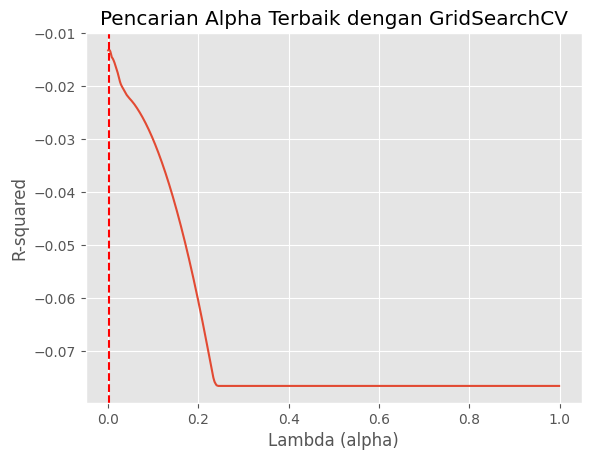

Lamda (alpha) terbaik untuk model ini adalah: 0.0021


In [ ]:
# Dapatkan nilai alpha dari GridSearchCV
alphas = lasso.cv_results_['param_model__alpha'].data
scores = lasso.cv_results_['mean_test_score']


# Buat plot
plt.plot(alphas, scores)
plt.xlabel('Lambda (alpha)')
plt.ylabel('R-squared')
plt.title('Pencarian Alpha Terbaik dengan GridSearchCV')
plt.axvline(best_alpha, color='red', linestyle='dashed')
plt.show()

# Latih model dengan alpha terbaik
lasso = Lasso(alpha=best_alpha)
lasso.fit(x_train, y_train)


# Ekstrak model Lasso
#lasso = best_model.named_steps['model']

# Format kalimat dan print hasilnya
print("Lamda (alpha) terbaik untuk model ini adalah:", best_alpha)


**Section Selanjutnya akan melihat apakah model overfit apa tidak mengunakan regularization**

In [ ]:
lr_y_pred = lasso.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,lr_y_pred)
print("r_2 score",score)

r_2 score 0.86434209376071


In [ ]:
## train score
train_score = lasso.score(x_train,y_train)
print('Train score dari regressi LASSO adalah:',train_score)

Train score dari regressi LASSO adalah: 0.8239026001497458


In [ ]:
print(lasso.intercept_)
#lasso.intercept_

0.1719899211837767


In [ ]:
#lasso.coef_
print(lasso.coef_)

[ 0.20132061 -0.         -0.          0.          0.06405237 -0.06598875
 -0.23520081  0.81712424]


In [ ]:
# Mengambil coeffisient Liniar dan Print
lasso_coefficient = pd.DataFrame()
lasso_coefficient["Columns"]= x_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_)
print("coefficient ketika alpha=cv_alpha: \n", lasso_coefficient)

#manual
#lasso_coefficient = pd.DataFrame()
#lasso_coefficient["Columns"]= x_train.columns
#print("coefficient ketika alpha=0.5: \n", lasso_coefficient) #<---- jalan kan ini bila manual
#lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_) #<---- jalan kan ini bila manual

coefficient ketika alpha=cv_alpha: 
   Columns  Coefficient Estimate
0     SBI              0.201321
1     CPI             -0.000000
2     EXP             -0.000000
3     IMP              0.000000
4      M2              0.064052
5    OECD             -0.065989
6     GPM             -0.235201
7    TLKM              0.817124


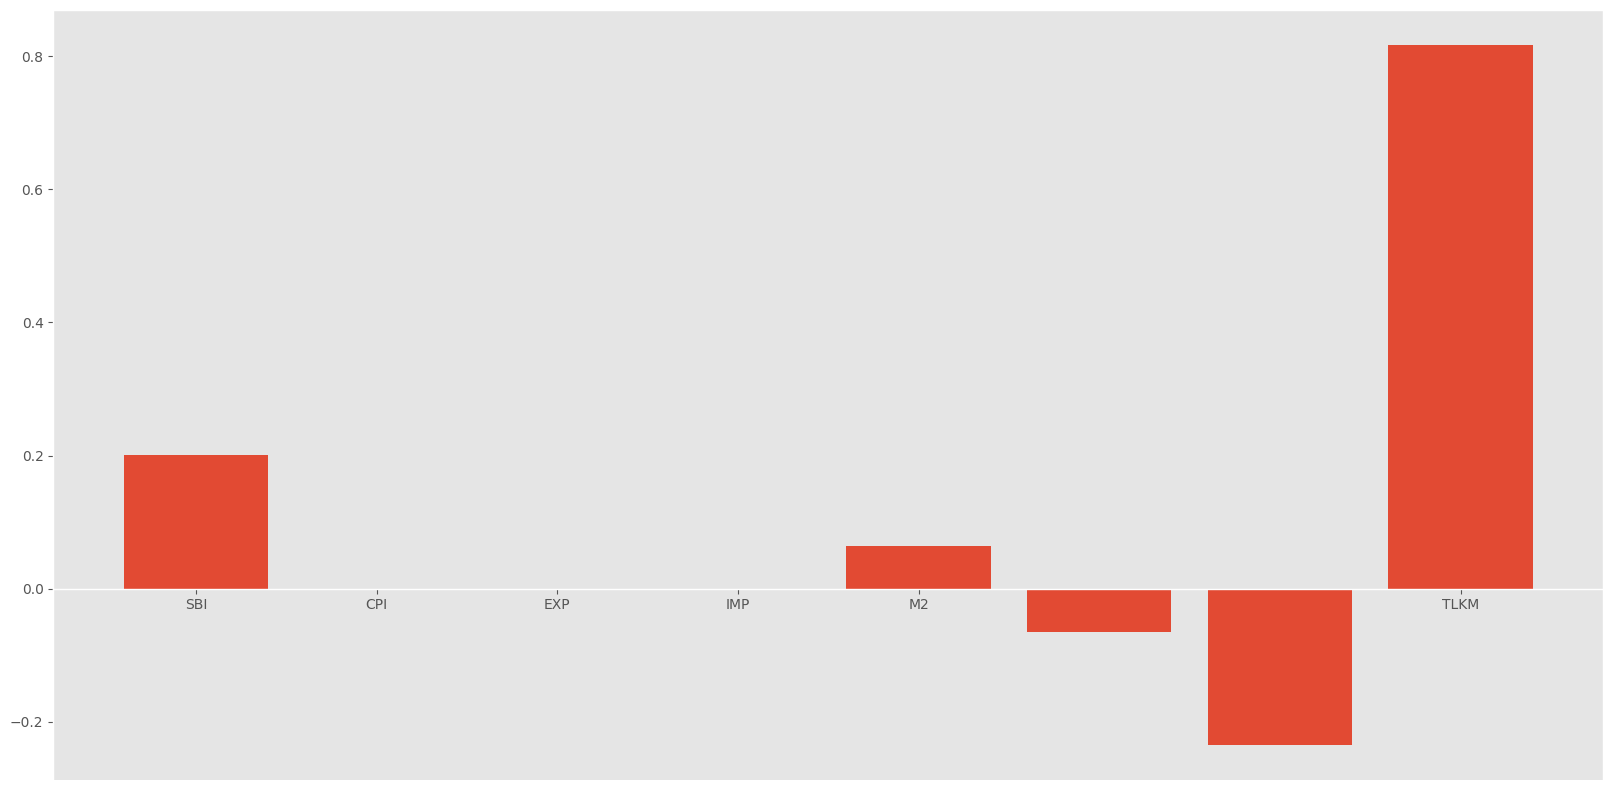

In [ ]:
#plotting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

ax.bar(lasso_coefficient["Columns"],
lasso_coefficient['Coefficient Estimate'])

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.grid()
plt.show()

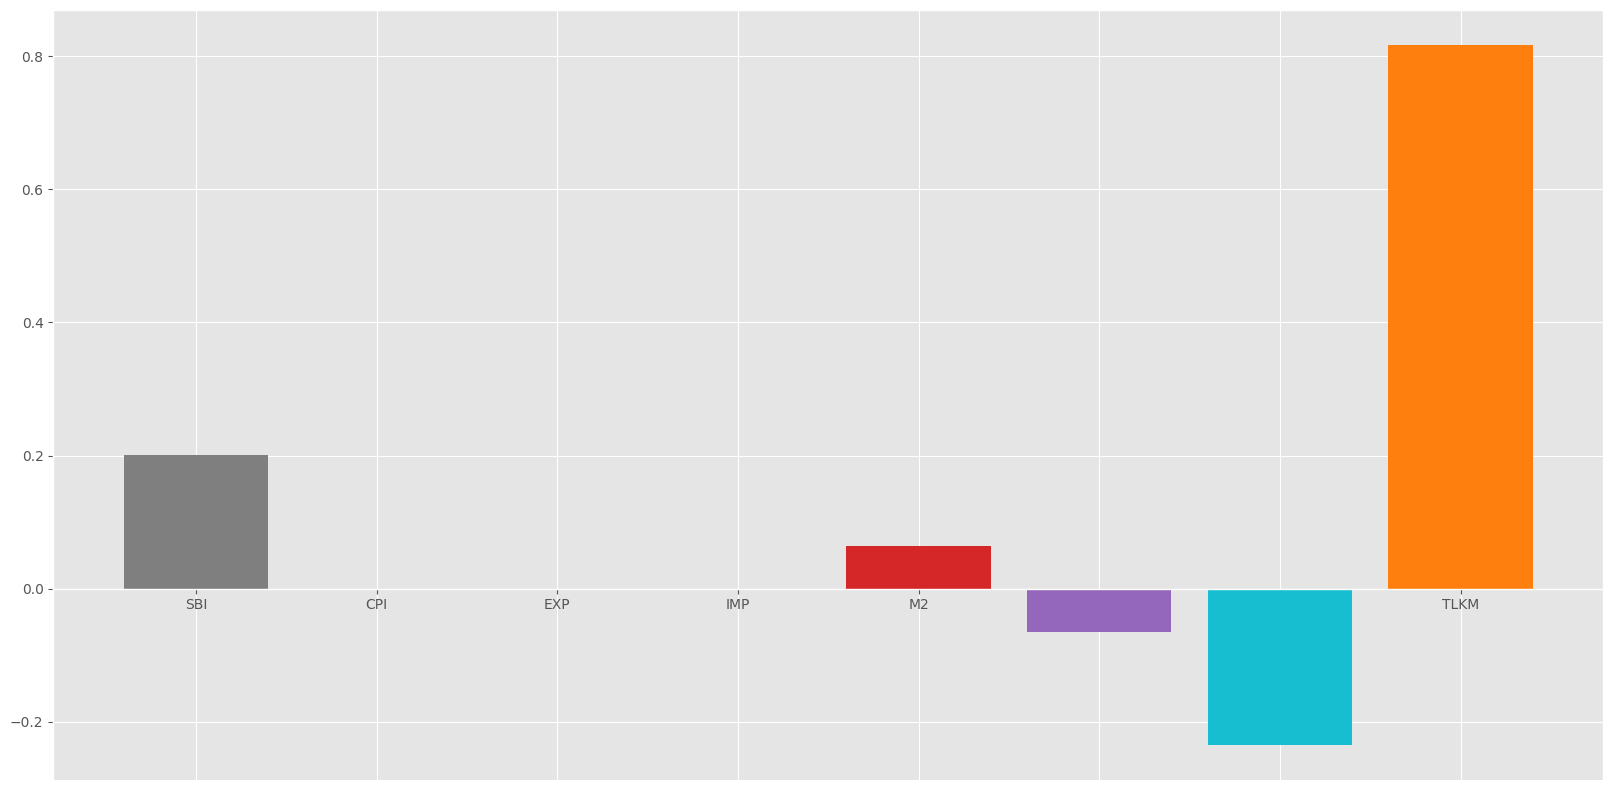

In [ ]:
#ploting the coefficient score
fig, ax = plt.subplots(figsize =(20, 10))

color =['tab:gray', 'tab:blue', 'tab:orange',
'tab:green', 'tab:red', 'tab:purple', 'tab:cyan',
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lasso_coefficient["Columns"],
       lasso_coefficient['Coefficient Estimate'], color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [ ]:
from sklearn import metrics
print("Mean Absolute Error pada Test Data Dari Regresi Linear:", metrics.mean_absolute_error(y_test,lr_y_pred))
print("Mean Squared Error pada Test Data Dari Regresi Linear:",metrics.mean_squared_error(y_test,lr_y_pred))
print('Root Mean Squared Error on Test Data dari Regresi Linear:', np.sqrt(metrics.mean_squared_error(y_test,lr_y_pred)))

Mean Absolute Error pada Test Data Dari Regresi Linear: 0.08190004650052224
Mean Squared Error pada Test Data Dari Regresi Linear: 0.010535615629154964
Root Mean Squared Error on Test Data dari Regresi Linear: 0.10264314701505875


Memasukan variable yang kofisien !=0
dan membuang variable yang kofisien == 0

In [ ]:

# Get the coefficients
coefficients = lasso.coef_

# buang fitur yang memiliki kofisien 0
features_to_drop = names[coefficients == 0]

# Create a copy of X for modification
X_modified = X.copy()

# Drop the features with non-zero coefficients
X_modified = X_modified.drop(features_to_drop, axis=1)

# Reintroduce the 'Tanggal' column
#X_modified['Tanggal'] = df['Tanggal']

# Verify the changes
print(X_modified.head())

x_test_modified = x_test.copy()
x_train_modified = x_train.copy()

x_test_modified = x_test_modified.drop(features_to_drop, axis=1)
x_train_modified = x_train_modified.drop(features_to_drop, axis=1)



    SBI            M2    OECD        GPM  TLKM
0  4.50  1.262111e+11   98.45 -32.733629  3.15
1  4.50  1.235632e+11   99.08 -17.573075  3.50
2  4.50  1.168747e+11  100.12  -1.423400  3.16
3  4.75  1.263023e+11  100.89   2.779785  3.49
4  5.00  1.277356e+11  101.34   1.054202  3.80


In [ ]:
import pandas as pd


# Menggabungkan y_train dan y_test

y1 = np.concatenate((y_train, y_test))

print(y1.shape)
print(y1)
# Menggabungkan x_train_modified dan x_test_modified
x1 = np.concatenate((x_train_modified, x_test_modified))
print(x1)

print(x1.shape)

# Data 1D yang benar
date = [['2023-04-01'], ['2023-04-02'], ['2023-04-03']]  # Tambahkan tanggal di sini
y_train = [1, 2, 3]  # Tambahkan data y_train
x_train_modified = [0.5, 0.7, 0.2]  # Tambahkan data x_train_modified

# Pastikan panjang date, y_train, dan x_train_modified sama

# Buat dataframe dari date, y_train, dan x_train_modified
df2 = pd.DataFrame({'date': date, 'y_train': y_train, 'x_train_modified': x_train_modified})

# Urutkan dataframe berdasarkan date
df2 = df2.sort_values(by=['date'])  # Lebih baik menggunakan by=['date']

# Set date sebagai index
df2.set_index('date', inplace=True)  # inplace=True untuk langsung memodifikasi df2

# Print dataframe
print(df2)

(125,)
[0.71300448 0.         0.8206278  0.1326073  0.47533632 0.06841768
 0.30941704 0.64445868 0.58962204 0.6111467  0.73991031 0.07238949
 0.72133248 0.16591928 0.11402947 0.743754   0.60986547 1.
 0.46957079 0.75336323 0.6495836  0.3549007  0.61909033 0.64433056
 0.68353619 0.15310698 0.39397822 0.58616272 0.11467008 0.05637412
 0.67200512 0.74887892 0.62101217 0.03651505 0.61832159 0.79820628
 0.63741192 0.04138373 0.62677771 0.39461883 0.00422806 0.14926329
 0.36643177 0.61883408 0.70685458 0.06534273 0.12107623 0.64894299
 0.70147341 0.15631006 0.81101858 0.06918642 0.0702114  0.08712364
 0.72837924 0.66047406 0.61857783 0.44330557 0.39244074 0.14157591
 0.61870596 0.5342729  0.57206919 0.67777066 0.08251121 0.69122357
 0.78795644 0.40871236 0.56694427 0.07238949 0.60576553 0.8590647
 0.7181294  0.66367713 0.3983344  0.77898783 0.58321589 0.70941704
 0.66111467 0.10787956 0.07815503 0.61960282 0.72966047 0.14003844
 0.64766176 0.02690583 0.1454196  0.40679052 0.06630365 0.735426